<a href="https://colab.research.google.com/github/kimhj010502/ESAA_YB/blob/main/YB_2%EC%A1%B0_%EB%B0%A9%ED%95%99_%ED%94%84%EB%A1%9C%EC%A0%9D%ED%8A%B8_%EC%B5%9C%EC%A2%85.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 신용카드 사기 거래 탐지 AI 경진대회
[경진대회 링크](https://dacon.io/competitions/official/235930/overview/description)

신용카드 회사는 사기성 신용카드 거래를 탐지하여 고객이 구매하지 않은 항목에 대해 요금을 청구하지 않는 것이 중요하며, 이러한 문제를 해결하기 위한 사기 거래를 사전에 탐지할 수 있는 도구가 필요합니다.

그러나 매일 누적되는 방대한 양의 신용카드 거래 데이터 속에서 사기 거래는 극히 일부이며, 방대한 양의 사기 거래 케이스의 데이터를 구축하기에는 너무나도 많은 시간이 소요될 것입니다. 또한 모든 데이터에 대해서 사기 거래 여부를 확인하고 기록하는 작업(Labeling)은 많은 비용을 필요로 합니다.

만약, 신용카드 사기 거래의 여부를 모르는 방대한 데이터로도 사기 거래를 탐지할 수 있는 AI 모델(Unsupervised Anomaly Detection)을 개발할 수 있다면 데이터 구축에 필요한 시간, 비용의 문제도 모두 해결할 수 있을 것입니다.

추가로, 기존에 구축된 신용카드 사기 거래 여부를 알 수 있는 데이터셋(Validation)은 데이커분들이 이러한 AI 모델을 개발하고 자체적으로 성능을 평가해보는 것에 있어서 큰 도움을 줄 것입니다.

따라서 데이터 구축관련 비용 문제를 해결하고, 신용카드 사기 거래 역시 완벽히 탐지해낼 수 있는 AI 모델을 개발해주세요!

### 평가 규칙
심사 기준: macro f1-score

- 1차 평가(Public Score): 테스트 데이터 중 랜덤 샘플 된 30%로 채점, 대회 기간 중 공개
- 2차 평가(Private Score): 테스트 데이터 중 나머지 70%로 채점, 대회 종료 직후 공개

최종 순위는 선택된 파일 중에서 채점되므로, 참가자는 제출 창에서 자신이 최종적으로 채점 받고 싶은 파일 2개를 선택해야 함
2개의 선택 파일 중 높은 점수를 기준으로 최송 순위를 결정(최종 파일 미선택시 처음으로 제출한 파일로 자동 선택됨,)

대회 직후 공개되는 Private Score 랭킹은 최종 순위가 아니며, 코드 검증 후 최종 수상자가 결정됨
대회 평가 규칙을 준수한 제출팀 중 Private Score를 기준으로 최종 순위를 결정

### 필요한 라이브러리 Import

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings(action='ignore')

### 데이터 로드

#### 1. 학습(Train) 데이터셋 (113842개)

- 파일명: train.csv
- 설명: 정상, 사기 거래의 여부를 알 수 없는(대부분 정상 거래) 신용 카드 데이터 (Unlabeled)
- ID : 신용 카드 거래 ID
- Column ('V1', 'V2', 'V3', ... ,'V30) : 비식별화된 신용 카드 거래 Feature

In [ ]:
train_df = pd.read_csv('/content/train.csv')
train_df = train_df.drop(columns=['ID'])
print(train_df.shape)
train_df.head()

(113842, 30)


,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,V29,V30
0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,4.983721,-0.994972
1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,1.418291,-0.994972
2,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,-0.568671,-0.371407,...,-0.208254,-0.559825,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,-0.256131,-0.994960
3,-0.644269,1.417964,1.074380,-0.492199,0.948934,0.428118,1.120631,-3.807864,0.615375,1.249376,...,1.943465,-1.015455,0.057504,-0.649709,-0.415267,-0.051634,-1.206921,-1.085339,0.262698,-0.994901
4,-0.894286,0.286157,-0.113192,-0.271526,2.669599,3.721818,0.370145,0.851084,-0.392048,-0.410430,...,-0.073425,-0.268092,-0.204233,1.011592,0.373205,-0.384157,0.011747,0.142404,0.994900,-0.994901


#### 2. 검증(Validation) 데이터셋 (28462개)

- 파일명: val.csv
- 설명: 정상, 사기 거래의 여부가 포함된 신용 카드 데이터 (학습 불가능, 규칙 참고)
- ID : 신용 카드 거래 ID
- Column ('V1', 'V2', 'V3', ... ,'V30) : 비식별화된 신용 카드 거래 Feature
- Class : 신용 카드 거래의 정상, 사기 여부 (정상 : 0, 사기 : 1)

In [ ]:
val_df = pd.read_csv('/content/val.csv')
val_df = val_df.drop(columns=['ID'])
print(val_df.shape)
val_df.head()

(28462, 31)


,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V22,V23,V24,V25,V26,V27,V28,V29,V30,Class
0,-0.338262,1.119593,1.044367,-0.222187,0.499361,-0.246761,0.651583,0.069539,-0.736727,-0.366846,...,-0.633753,-0.120794,-0.385050,-0.069733,0.094199,0.246219,0.083076,-0.255991,-0.994878,0
1,0.962496,0.328461,-0.171479,2.109204,1.129566,1.696038,0.107712,0.521502,-1.191311,0.724396,...,0.402492,-0.048508,-1.371866,0.390814,0.199964,0.016371,-0.014605,0.168937,-0.994784,0
2,1.145524,0.575068,0.194008,2.598192,-0.092210,-1.044430,0.531588,-0.241888,-0.896287,0.757952,...,-0.119703,-0.076510,0.691320,0.633984,0.048741,-0.053192,0.016251,0.169496,-0.994502,0
3,0.927060,-0.323684,0.387585,0.544474,0.246787,1.650358,-0.427576,0.615371,0.226278,-0.225495,...,0.079359,0.096632,-0.992569,0.085096,0.377447,0.036096,-0.005960,0.331307,-0.994467,0
4,-3.005237,2.600138,1.483691,-2.418473,0.306326,-0.824575,2.065426,-1.829347,4.009259,6.051521,...,-0.181268,-0.163747,0.515821,0.136318,0.460054,-0.251259,-1.105751,-0.287012,-0.994373,0


#### 3. 테스트(Test) 데이터셋 (142503개)

- 파일명: test.csv
- 설명: 정상, 사기 거래의 여부를 알 수 없는(대부분 정상 거래) 신용 카드 데이터 (Unlabeled)
- ID : 신용 카드 거래 ID
- Column ('V1', 'V2', 'V3', ... ,'V30) : 비식별화된 신용 카드 거래 Feature

In [ ]:
test_df = pd.read_csv('/content/test.csv')
test_df = test_df.drop(columns=['ID'])
print(test_df.shape)
test_df.head()

(142503, 30)


,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,V29,V30
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,1.783274,-0.994983
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,-0.269825,-0.994983
2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0.670579,-0.994960
3,1.229658,0.141004,0.045371,1.202613,0.191881,0.272708,-0.005159,0.081213,0.464960,-0.099254,...,-0.167716,-0.270710,-0.154104,-0.780055,0.750137,-0.257237,0.034507,0.005168,-0.237686,-0.994937
4,0.384978,0.616109,-0.874300,-0.094019,2.924584,3.317027,0.470455,0.538247,-0.558895,0.309755,...,0.049924,0.238422,0.009130,0.996710,-0.767315,-0.492208,0.042472,-0.054337,-0.167819,-0.994866


### Train/Validation Feature 분포 확인

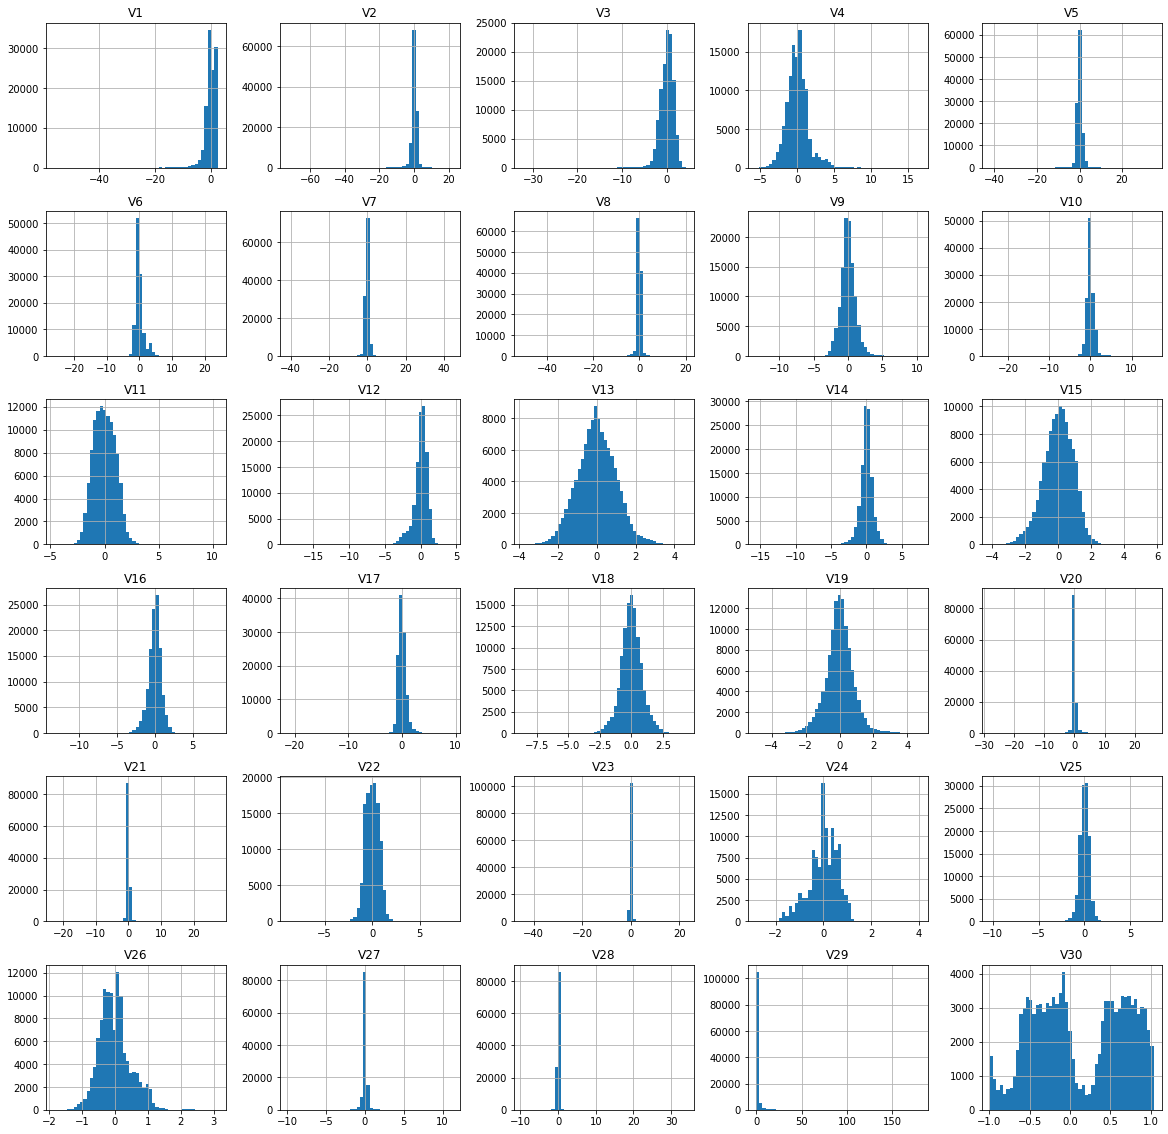

In [ ]:
train_df.hist(bins = 50, figsize = (20,20))
plt.show()

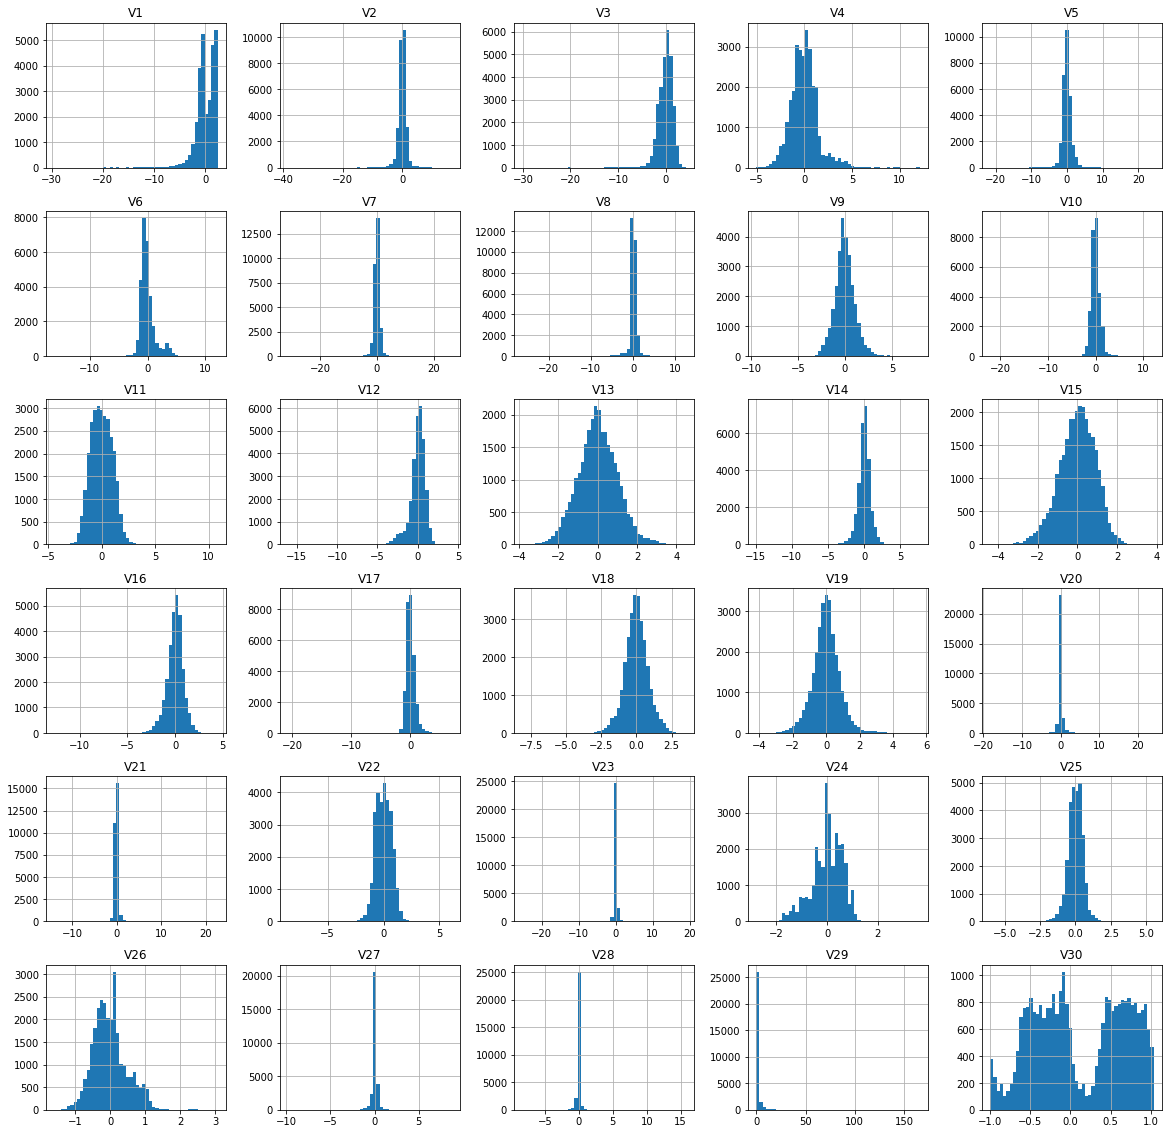

In [ ]:
val_df.drop(columns=['Class']).hist(bins = 50, figsize = (20,20))
plt.show()

---

## 데이터 전처리

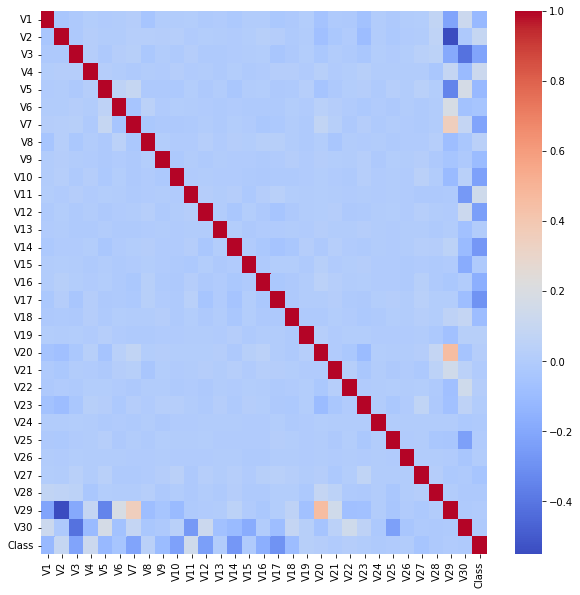

In [ ]:
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(val_df.corr(), cmap='coolwarm')

In [ ]:
val_df.corr()['Class'].sort_values()

V17     -0.290434
V14     -0.270852
V12     -0.239264
V10     -0.226813
V7      -0.214810
V3      -0.212345
V16     -0.169542
V5      -0.112254
V1      -0.109284
V9      -0.098666
V18     -0.096104
V6      -0.045676
V27     -0.043127
V28     -0.018156
V30     -0.010476
V24     -0.010131
V15     -0.009532
V25     -0.003573
V29     -0.001762
V21     -0.001090
V13      0.001800
V23      0.005015
V26      0.005371
V20      0.015873
V22      0.016996
V19      0.024223
V8       0.038359
V2       0.096823
V4       0.126146
V11      0.142082
Class    1.000000
Name: Class, dtype: float64

### Class와의 상관계수가 0.01보다 작은 변수 분포 확인

#### [상관계수가 0.01 이하인 변수]
     
V15     -0.009532  
V25     -0.003573  
V29     -0.001762  
V21     -0.001090  
V13      0.001800  
V23      0.005015  
V26      0.005371  

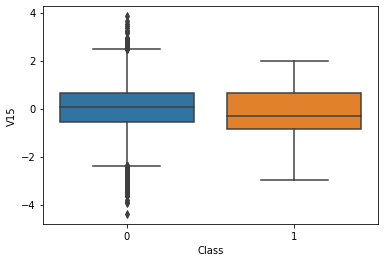

In [ ]:
#V15: -0.009532
sns.boxplot(x='Class', y='V15', data=val_df)

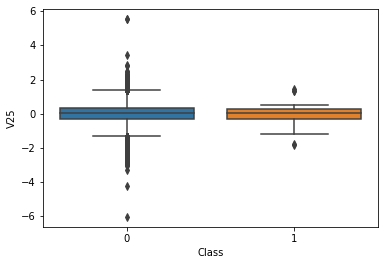

In [ ]:
#V25: -0.003573
sns.boxplot(x='Class', y='V25', data=val_df)

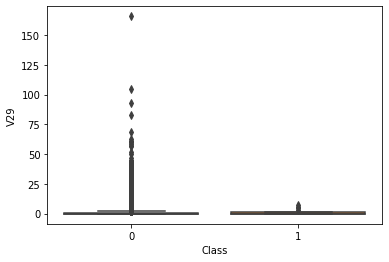

In [ ]:
#V29: -0.001762
sns.boxplot(x='Class', y='V29', data=val_df)

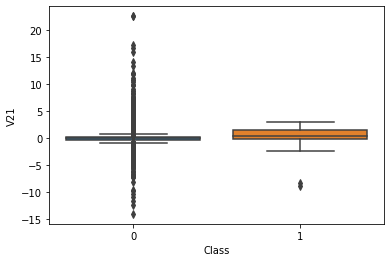

In [ ]:
#V21: -0.001090
sns.boxplot(x='Class', y='V21', data=val_df)

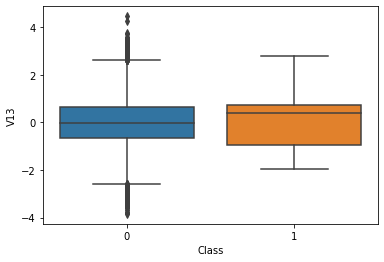

In [ ]:
#V13: 0.001800
sns.boxplot(x='Class', y='V13', data=val_df)

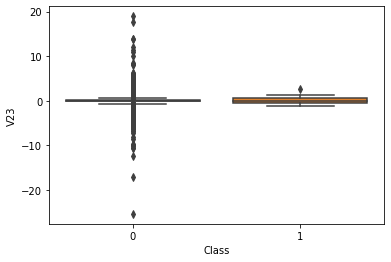

In [ ]:
#V23: 0.005015
sns.boxplot(x='Class', y='V23', data=val_df)

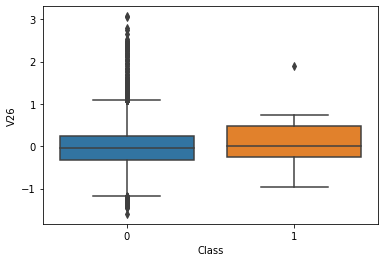

In [ ]:
#V26: 0.005371
sns.boxplot(x='Class', y='V26', data=val_df)

### Class와의 상관계수가 0.05보다 작은 변수 분포 확인

#### [상관계수가 0.01 이상 0.05 이하인 변수]
    
V6      -0.045676  
V27     -0.043127  
V28     -0.018156  
V30     -0.010476  
V24     -0.010131  
  
V20      0.015873  
V22      0.016996  
V19      0.024223  
V8       0.038359  

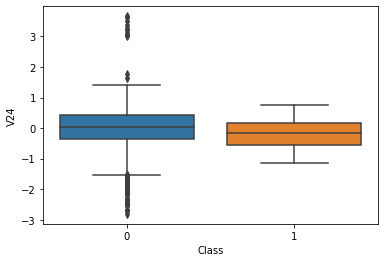

In [ ]:
#V24: -0.010131
sns.boxplot(x='Class', y='V24', data=val_df)

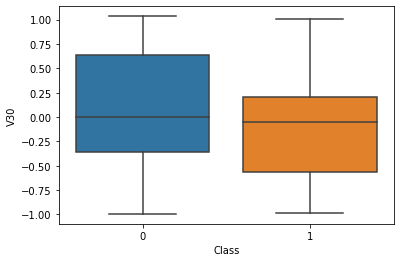

In [ ]:
#V30: -0.010476
sns.boxplot(x='Class', y='V30', data=val_df)

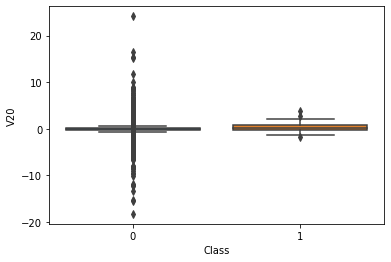

In [ ]:
#V20: 0.015873
sns.boxplot(x='Class', y='V20', data=val_df)

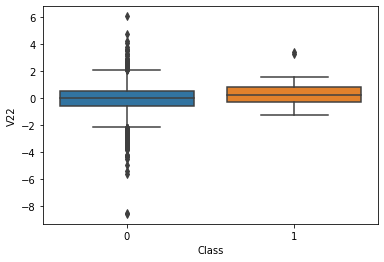

In [ ]:
#V22: 0.016996
sns.boxplot(x='Class', y='V22', data=val_df)

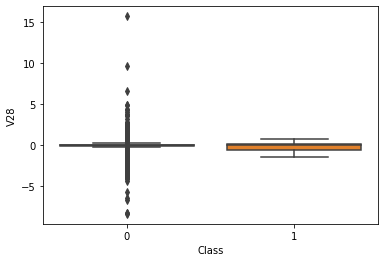

In [ ]:
#V28: -0.018156
sns.boxplot(x='Class', y='V28', data=val_df)

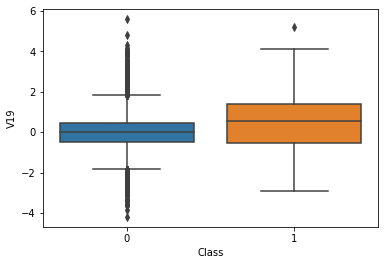

In [ ]:
#V19: 0.024223
sns.boxplot(x='Class', y='V19', data=val_df)

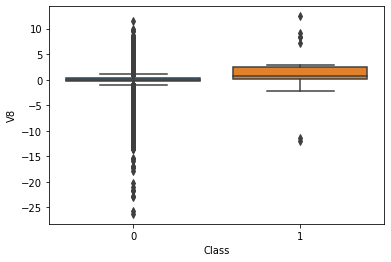

In [ ]:
#V8: 0.038359
sns.boxplot(x='Class', y='V8', data=val_df)

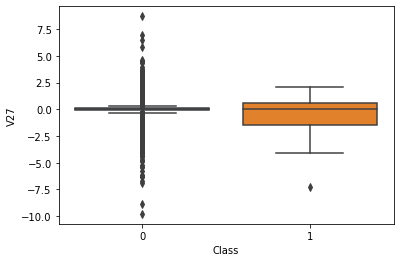

In [ ]:
#V27: -0.043127
sns.boxplot(x='Class', y='V27', data=val_df)

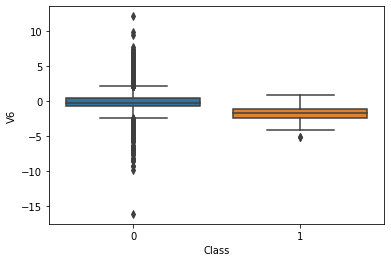

In [ ]:
#V6: -0.045676
sns.boxplot(x='Class', y='V6', data=val_df)

### -> 0.05 말고 0.03 기준으로 잡기

V28     -0.018156  
V30     -0.010476  
V24     -0.010131  
V15     -0.009532  
V25     -0.003573  
V29     -0.001762  
V21     -0.001090  
V13      0.001800  
V23      0.005015  
V26      0.005371  
V20      0.015873  
V22      0.016996  
V19      0.024223  

### 변수 제거

In [ ]:
val_df_new = val_df.drop(columns=['V28','V30','V24','V15','V25','V29','V21','V13','V23','V26','V20','V22','V19'])
train_df_new = train_df.drop(columns=['V28','V30','V24','V15','V25','V29','V21','V13','V23','V26','V20','V22','V19'])
test_df_new = test_df.drop(columns=['V28','V30','V24','V15','V25','V29','V21','V13','V23','V26','V20','V22','V19'])

In [ ]:
val_df_new.corr()['Class'].sort_values()

V17     -0.290434
V14     -0.270852
V12     -0.239264
V10     -0.226813
V7      -0.214810
V3      -0.212345
V16     -0.169542
V5      -0.112254
V1      -0.109284
V9      -0.098666
V18     -0.096104
V6      -0.045676
V27     -0.043127
V8       0.038359
V2       0.096823
V4       0.126146
V11      0.142082
Class    1.000000
Name: Class, dtype: float64

In [ ]:
train_df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113842 entries, 0 to 113841
Data columns (total 17 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   V1      113842 non-null  float64
 1   V2      113842 non-null  float64
 2   V3      113842 non-null  float64
 3   V4      113842 non-null  float64
 4   V5      113842 non-null  float64
 5   V6      113842 non-null  float64
 6   V7      113842 non-null  float64
 7   V8      113842 non-null  float64
 8   V9      113842 non-null  float64
 9   V10     113842 non-null  float64
 10  V11     113842 non-null  float64
 11  V12     113842 non-null  float64
 12  V14     113842 non-null  float64
 13  V16     113842 non-null  float64
 14  V17     113842 non-null  float64
 15  V18     113842 non-null  float64
 16  V27     113842 non-null  float64
dtypes: float64(17)
memory usage: 14.8 MB


In [ ]:
test_df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 142503 entries, 0 to 142502
Data columns (total 17 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   V1      142503 non-null  float64
 1   V2      142503 non-null  float64
 2   V3      142503 non-null  float64
 3   V4      142503 non-null  float64
 4   V5      142503 non-null  float64
 5   V6      142503 non-null  float64
 6   V7      142503 non-null  float64
 7   V8      142503 non-null  float64
 8   V9      142503 non-null  float64
 9   V10     142503 non-null  float64
 10  V11     142503 non-null  float64
 11  V12     142503 non-null  float64
 12  V14     142503 non-null  float64
 13  V16     142503 non-null  float64
 14  V17     142503 non-null  float64
 15  V18     142503 non-null  float64
 16  V27     142503 non-null  float64
dtypes: float64(17)
memory usage: 18.5 MB


In [ ]:
val_x = val_df_new.drop(columns=['Class']) # Input Data
val_y = val_df_new['Class'] # Label

-----------------------------------------------

##모델 학습 및 예측




In [ ]:
def get_pred_label(model_pred):
    # IsolationForest 모델 출력 (1:정상, -1:불량(사기)) 이므로 (0:정상, 1:불량(사기))로 Label 변환
    model_pred = np.where(model_pred == 1, 0, model_pred)
    model_pred = np.where(model_pred == -1, 1, model_pred)
    return model_pred

#### K-means

k-means

- 군집화에서 가장 일반적으로 사용되는 알고리즘.

- 군집 중심(centroid)이라는 특정한 임의의 지점을 선택해 해당 중심에 가장 가까운 포인트들을 선택함.

- 유클리드 거리(Euclidean distance)를 측정해 중심점과의 거리를 최소화하는 작업을 반복하여 분류함.

In [ ]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=2, init='k-means++', max_iter=300)
kmeans_pred = kmeans.fit_predict(train_df_new)

In [ ]:
train_new = train_df_new.copy()
train_new['label'] = kmeans.labels_

from sklearn.metrics import silhouette_samples
score_samples = silhouette_samples(train_df_new, kmeans_pred)
train_new['silhouette_coeff'] = score_samples
train_new.head(3)

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V14,V16,V17,V18,V27,label,silhouette_coeff
0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,-0.165946,-2.890083,1.109969,-0.121359,-0.055353,0,0.005918
1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,-0.287924,-1.059647,-0.684093,1.965775,0.062723,0,0.049146
2,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,-0.568671,-0.371407,1.341262,0.359894,-0.137134,0.401726,-0.058133,0.068653,0.253844,0,0.017456


In [ ]:
## 군집별 평균 실루엣 계수 값 알아보기
train_new.groupby('label')['silhouette_coeff'].mean()

label
0    0.012131
1    0.279905
Name: silhouette_coeff, dtype: float64

In [ ]:
# 전체 데이터의 평균 실루엣 계수 값 알아보기
from sklearn.metrics import silhouette_score
silhouette_score(train_df_new, kmeans_pred)

0.13875215248405048

In [ ]:
kmeans = KMeans(n_clusters=2, init='k-means++', max_iter=300)
kmeans_val_pred = kmeans.fit_predict(val_x)

In [ ]:
from sklearn.metrics import f1_score
f1_score(val_y, kmeans_val_pred, average='macro')

0.32274526782643714

#### One-Class SVM

One-Class SVM
- 클래스 데이터가 매우 불균형하거나 하나의 클래스 값의 데이터만 있고 나머지 데이터가 없는 경우에 사용되는 방법
- 주어진 데이터를 잘 설명할 수 있는 최적의 support vector를 구하고 이 영역 밖의 데이터들은 이상치로 간주하는 방식
- 일반 클래스인 1개의 클래스만 학습하여 분류하는 방법으로 정상적인 경우의 속성을 추론하고 이러한 속성으로부터 어떤 예가 일반적인 예와 다른지 예측하여 이상치를 검출

In [ ]:
val_normal, val_fraud = val_df_new['Class'].value_counts()
val_contamination = val_fraud / val_normal
print('Validation contamination :', val_contamination)

Validation contamination : 0.0010551491277433877


In [ ]:
from sklearn import svm
ocsvm = svm.OneClassSVM(nu = val_contamination, kernel = "rbf", gamma=0.001)
ocsvm.fit(train_df_new)

OneClassSVM(gamma=0.001, nu=0.0010551491277433877)

In [ ]:
ocsvm_val_pred = ocsvm.predict(val_x) #model prediction
ocsvm_val_pred = get_pred_label(ocsvm_val_pred)

In [ ]:
f1_score(val_y, ocsvm_val_pred, average='macro')

0.6861153460396092

#### IsolationForest

IsolationForest
- 이상치를 찾아내는 데 쓰이는 Decision Tree 기반 알고리즘. 

- 피처를 랜덤하게 선택하고, 선택된 피처에 대해 무작위적으로 최소~최대 내의 값을 선택해 분류함.

- Tree Root Node에 가까울수록 정상치일 가능성 높고, 멀수록 비정상치일 가능성 높은 특성 이용해 이상지수 계산하고 이상치 여부 판단함.

In [ ]:
from sklearn.ensemble import IsolationForest
isfo = IsolationForest(n_estimators=250, max_samples=len(train_df_new), contamination=val_contamination, verbose=0, random_state=42)
isfo.fit(train_df_new)

IsolationForest(contamination=0.0010551491277433877, max_samples=113842,
                n_estimators=250, random_state=42)

In [ ]:
isfo_val_pred = isfo.predict(val_x)
isfo_val_pred = get_pred_label(isfo_val_pred)

In [ ]:
f1_score(val_y, isfo_val_pred, average='macro')

0.7629204987075104

---

#### IocalOutlierFactor

LocalOutlierFactor (LOF)

- local 정보를 이용해 이상치 탐지를 하는 알고리즘.

- 해당 관측치의 주변 데이터(neighbor)를 통해 local density를 파악하고 이상치 정도를 판단함.

In [ ]:
from sklearn.neighbors import LocalOutlierFactor
lof = LocalOutlierFactor()
lof_pred = lof.fit(train_df_new)

In [ ]:
lof_val_pred = lof.fit_predict(val_x)
lof_val_pred = get_pred_label(lof_val_pred)

In [ ]:
f1_score(val_y, lof_val_pred, average='macro')

0.5047855544693256

### f1-score 상위 3개 모델 합치기

In [ ]:
pred1 = pd.DataFrame(isfo_val_pred)
pred2 = pd.DataFrame(lof_val_pred)
pred3 = pd.DataFrame(ocsvm_val_pred)
pred4 = pd.concat([pred1, pred2, pred3], axis=1)
pred4 = pd.DataFrame(pred4)
pred4.columns=['IsFo','LOF','SVM']
pred4.head()

,IsFo,LOF,SVM
0,0,0,0
1,0,0,0
2,0,0,0
3,0,0,0
4,0,0,0


In [ ]:
pred4['total'] = pred4.sum(axis=1)
pred4.head()

,IsFo,LOF,SVM,total
0,0,0,0,0
1,0,0,0,0
2,0,0,0,0
3,0,0,0,0
4,0,0,0,0


In [ ]:
pred4['total'].value_counts()

0    26982
1     1446
3       20
2       14
Name: total, dtype: int64

#### 이상치 판단 기준1

In [ ]:
def func1(list): #세 개의 알고리즘에서 1개 이상이 이상치인 것을 이상치로 취급
  pred = np.ndarray(len(list))
  for i in range(len(list)):
    if list[i] >= 1:
      pred[i] = 1
    else:
      pred[i] = 0
  return pred

In [ ]:
test_pred4 = func1(pred4['total'])
test_pred4 = list(map(int, test_pred4))
print(test_pred4)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

In [ ]:
test_pred4 = pd.Series(test_pred4)
test_pred4.value_counts()

0    26982
1     1480
dtype: int64

In [ ]:
f1_score(val_y, test_pred4, average='macro')

0.5047433204175099

#### 이상치 판단 기준2

In [ ]:
def func2(list): #세 개의 알고리즘에서 2개 이상이 이상치인 것만 이상치로 취급
  pred = np.ndarray(len(list))
  for i in range(len(list)):
    if list[i] >= 2:
      pred[i] = 1
    else:
      pred[i] = 0
  return pred

In [ ]:
test_pred5 = func2(pred4['total'])
test_pred5 = list(map(int, test_pred5))
print(test_pred5)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

In [ ]:
test_pred5 = pd.Series(test_pred5)
test_pred5.value_counts()

0    28428
1       34
dtype: int64

In [ ]:
f1_score(val_y, test_pred5, average='macro')

0.7340760200492438

### IsolationForest 파라미터 튜닝

In [ ]:
from sklearn.model_selection import GridSearchCV
params = {'max_samples': [len(train_df_new)],
          'max_features': [0.8, 0.9, 1.0],
          'contamination': [0.0010551491277433877]
          }

In [ ]:
isfo = IsolationForest(verbose=0, random_state=42)
gridcv = GridSearchCV(isfo, param_grid=params, cv=3, scoring='f1_macro')

In [ ]:
gridcv.fit(train_df_new)

GridSearchCV(cv=3, estimator=IsolationForest(random_state=42),
             param_grid={'contamination': [0.0010551491277433877],
                         'max_features': [0.8, 0.9, 1.0],
                         'max_samples': [113842]},
             scoring='f1_macro')

In [ ]:
gridcv.best_params_

{'contamination': 0.0010551491277433877,
 'max_features': 0.8,
 'max_samples': 113842}

---

### 2차 전처리

In [ ]:
# 상관도 0.05 기준으로 설정
val_df_new = val_df.drop(columns=['V6','V27','V28','V30','V24','V15','V25','V29','V21','V13','V23','V26','V20','V22','V19','V8'])
train_df_new = train_df.drop(columns=['V6','V27','V28','V30','V24','V15','V25','V29','V21','V13','V23','V26','V20','V22','V19','V8'])
test_df_new = test_df.drop(columns=['V6','V27','V28','V30','V24','V15','V25','V29','V21','V13','V23','V26','V20','V22','V19','V8'])

### IsolationForest 재학습

In [ ]:
from sklearn.ensemble import IsolationForest
isfo = IsolationForest(n_estimators=250, max_samples=len(train_df_new), contamination=val_contamination, verbose=0, random_state=42)
isfo.fit(train_df_new)

IsolationForest(contamination=0.0010551491277433877, max_samples=113842,
                n_estimators=250, random_state=42)

In [ ]:
val_x = val_df_new.drop(columns=['Class']) # Input Data
val_y = val_df_new['Class'] # Label

In [ ]:
train_df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113842 entries, 0 to 113841
Data columns (total 14 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   V1      113842 non-null  float64
 1   V2      113842 non-null  float64
 2   V3      113842 non-null  float64
 3   V4      113842 non-null  float64
 4   V5      113842 non-null  float64
 5   V7      113842 non-null  float64
 6   V9      113842 non-null  float64
 7   V10     113842 non-null  float64
 8   V11     113842 non-null  float64
 9   V12     113842 non-null  float64
 10  V14     113842 non-null  float64
 11  V16     113842 non-null  float64
 12  V17     113842 non-null  float64
 13  V18     113842 non-null  float64
dtypes: float64(14)
memory usage: 12.2 MB


In [ ]:
isfo_val_pred = isfo.predict(val_x)
isfo_val_pred = get_pred_label(isfo_val_pred)

In [ ]:
f1_score(val_y, isfo_val_pred, average='macro')

0.7695862620151677

In [ ]:
isfo_test_pred = isfo.predict(test_df_new) # model prediction
isfo_test_pred = get_pred_label(isfo_test_pred)

In [ ]:
submission_df = pd.read_csv('/content/sample_submission.csv')
isfo_submit = submission_df
isfo_submit['Class'] = isfo_test_pred
isfo_submit.to_csv('./final_submit.csv', index=False)

**Score: 0.73161**